<h1>Сontents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Open-files-and-explore-them." data-toc-modified-id="Open-files-and-explore-them.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Open files and explore them.</a></span></li><li><span><a href="#Check-that-the-recovery-efficiency-is-calculated-correctly." data-toc-modified-id="Check-that-the-recovery-efficiency-is-calculated-correctly.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Check that the recovery efficiency is calculated correctly.</a></span></li><li><span><a href="#Analyze-the-parameters-that-are-not-available-in-the-test-dataset." data-toc-modified-id="Analyze-the-parameters-that-are-not-available-in-the-test-dataset.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analyze the parameters that are not available in the test dataset.</a></span></li><li><span><a href="#1.4--Perform-data-preprocessing." data-toc-modified-id="1.4--Perform-data-preprocessing.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>1.4  Perform data preprocessing.</a></span></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#See-how-the-concentration-of-metals-(Au,-Ag,-Pb)-changes-at-different-cleaning-stages." data-toc-modified-id="See-how-the-concentration-of-metals-(Au,-Ag,-Pb)-changes-at-different-cleaning-stages.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>See how the concentration of metals (Au, Ag, Pb) changes at different cleaning stages.</a></span></li><li><span><a href="#Compare-the-distributions-of-the-ore-grain-sizes-in-the-training-and-test-datasets.-If-the-distributions-are-significantly-different-from-each-other,-the-model-evaluation-will-be-incorrect." data-toc-modified-id="Compare-the-distributions-of-the-ore-grain-sizes-in-the-training-and-test-datasets.-If-the-distributions-are-significantly-different-from-each-other,-the-model-evaluation-will-be-incorrect.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Compare the distributions of the ore grain sizes in the training and test datasets. If the distributions are significantly different from each other, the model evaluation will be incorrect.</a></span></li><li><span><a href="#Investigate-the-total-concentration-of-all-substances-at-different-stages:-in-raw-materials,-in-rough-and-final-concentrates." data-toc-modified-id="Investigate-the-total-concentration-of-all-substances-at-different-stages:-in-raw-materials,-in-rough-and-final-concentrates.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Investigate the total concentration of all substances at different stages: in raw materials, in rough and final concentrates.</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Model-Training-and-Cross-Validation-Evaluation" data-toc-modified-id="Model-Training-and-Cross-Validation-Evaluation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Model Training and Cross-Validation Evaluation</a></span></li><li><span><a href="#Select-the-Best-Model-and-Test-it-on-the-Test-Set" data-toc-modified-id="Select-the-Best-Model-and-Test-it-on-the-Test-Set-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Select the Best Model and Test it on the Test Set</a></span></li></ul></li></ul></div>

# Recovery of gold from Ore.

Prepare a prototype of a machine learning model for "Digits". The company is developing solutions for efficient operation of industrial enterprises.

The model should predict the recovery rate of gold from gold-bearing ore. Use data on mining and processing parameters.

The model will help optimize production to avoid launching a facility with unprofitable characteristics.

we need to:

1. Prepare the data;
2. Conduct exploratory data analysis;
3. Build and train the model.


# Technological process

After the extracted ore undergoes primary processing, a crushed mixture is obtained. It is then sent for flotation (enrichment) and two-stage purification.

<b>Flotation</b>

The gold-bearing ore mixture is fed into the flotation plant. After enrichment, a rough concentrate and "tailings" are obtained, i.e. residues of the product with a low concentration of valuable metals. The stability of this process is affected by the inconsistent and suboptimal physico-chemical state of the flotation pulp (a mixture of solid particles and liquid).

<b>Purification</b>

The rough concentrate undergoes two stages of purification. The final concentrate and new tailings are obtained at the output.

# Description of data

<b>Technological process:</b>
        
    Rougher feed — raw material

    Rougher additions (or reagent additions) — flotation reagents: Xanthate, Sulphate, Depressant   

    Xanthate **— xanthogenate (promoter, or flotation activator);

    Sulphate — sulfate (sodium sulfide at this production);

    Depressant — depressant (sodium silicate).

    Rougher process — flotation

    Rougher tails — tailings

    Float banks — flotation installation

    Cleaner process — cleaning

    Rougher Au — rough gold concentrate

    Final Au — final gold concentrate

<b>Stage parameters:</b>

    air amount — air volume

    fluid levels — liquid level

    feed size — feed particle size

    feed rate — feed rate
    
<b>Naming conventions for features:</b>

Features should have the following naming convention:
[stage].[type_of_parameter].[parameter_name]

Possible values for the [stage] block:

    rougher — flotation
    primary_cleaner — primary cleaning
    secondary_cleaner — secondary cleaning
    final — final characteristics
    
Possible values for the [type_of_parameter] block:

    input — raw material parameters
    output — product parameters
    state — parameters characterizing the current stage state
    calculation — calculated parameters

##  Data preparation

### Open files and explore them.

In [59]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from collections import namedtuple

import warnings
warnings.filterwarnings("ignore")

In [2]:
gold_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
gold_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
gold_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

In [3]:
#Training set
gold_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [4]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [5]:
gold_train.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

In [6]:
print('Number of missing values in the training set:', gold_train.isnull().sum().sum())
print('Number of complete duplicates in the table:', gold_train.duplicated().sum())

Number of missing values in the training set: 4100
Number of complete duplicates in the table: 0


In [7]:
gold_train.shape

(14149, 86)

In [8]:
gold_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

In [10]:
#Test set
gold_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

In [11]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [255]:
gold_test.isna().sum()

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

In [12]:
print('Number of missing values in the test set:',gold_test.isnull().sum().sum())
print('Number of complete duplicates in the table: ',gold_test.duplicated().sum())

Number of missing values in the test set: 90
Number of complete duplicates in the table:  0


In [13]:
gold_test.shape

(5290, 52)

In [14]:
gold_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

In [15]:
#Source data (gold_recovery_full_new.csv)
gold_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [16]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

In [17]:
gold_full.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

In [18]:
print('Number of missing values in the full dataset:', gold_full.isnull().sum().sum())
print('Number of full duplicates in the table:', gold_full.duplicated().sum())

Number of missing values in the full dataset: 4481
Number of full duplicates in the table: 0


In [19]:
gold_full.shape

(19439, 86)

In [20]:
gold_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

We have familiarized ourselves with the data. We see that there are a lot of missing values, with the test set having the least amount of missing values.

###   Check that the recovery efficiency is calculated correctly.

Let's calculate it on the training set for the feature rougher.output.recovery. We will find the mean absolute error (MAE) between our calculations and the feature values. To do this, we will manually calculate the recovery efficiency using the formula:

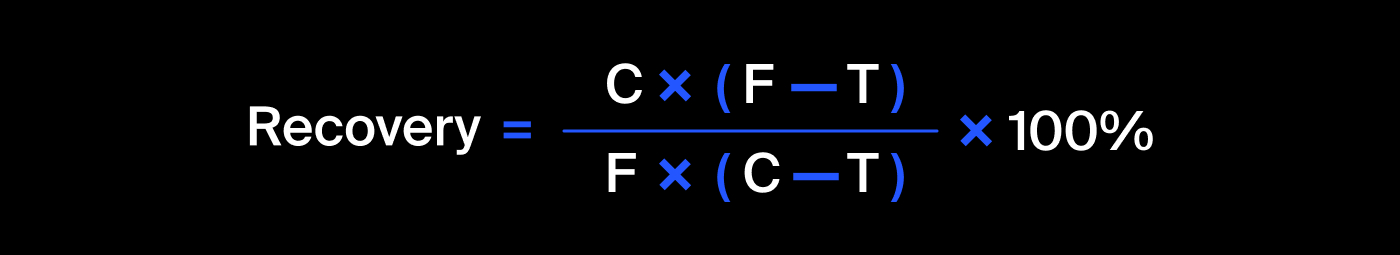

where:

C - the share of gold in the concentrate after flotation/cleaning

F - the share of gold in the ore/concentrate before flotation/cleaning

T - the share of gold in the tailings after flotation/cleaning

Then, we will find the mean absolute error between our calculations and the actual values in the column. This will allow us to determine whether the recovery efficiency has been calculated correctly for our feature. 

In [21]:
C = gold_train['rougher.output.concentrate_au']
F = gold_train['rougher.input.feed_au']
T = gold_train['rougher.output.tail_au']

In [22]:
recovery = (C * (F - T) / (F * (C - T))) * 100
print (recovery)

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 14149, dtype: float64


In [23]:
gold_train_mae = gold_train[~gold_train['rougher.output.recovery'].isna()]
print('MAE  = ',mean_absolute_error(gold_train_mae['rougher.output.recovery'],recovery))


MAE  =  9.73512347450521e-15


 The lower the MAE value, the better, which means that the recovery efficiency is calculated correctly.

### Analyze the parameters that are not available in the test dataset.

In [24]:
#function that returns columns present in one dataset but not in the other:
def fields_diff(first_df, second_df):
    return set(first_df.columns.to_list()) - set(second_df.columns.to_list())

In [26]:
missing_fields = fields_diff(gold_train, gold_test)
print("List of parameters for which there are missing values in the test set")
print(gold_train[missing_fields].dtypes)


List of parameters for which there are missing values in the test set
primary_cleaner.output.concentrate_au                 float64
rougher.calculation.au_pb_ratio                       float64
rougher.output.recovery                               float64
final.output.concentrate_pb                           float64
final.output.recovery                                 float64
primary_cleaner.output.concentrate_pb                 float64
rougher.output.concentrate_pb                         float64
primary_cleaner.output.tail_sol                       float64
final.output.concentrate_ag                           float64
primary_cleaner.output.tail_au                        float64
primary_cleaner.output.concentrate_sol                float64
final.output.concentrate_au                           float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
final.output.concentrate_sol                          float64
secondary_cleaner.output.tail_pb                      float64


The naming convention for the features should be:
[stage].[parameter_type].[parameter_name]

<b>Flotation, calculated parameters:</b>
    
 rougher.calculation.au_pb_ratio,
 
 rougher.calculation.floatbank10_sulfate_to_au_feed,
 
 rougher.calculation.floatbank11_sulfate_to_au_feed,
 
 rougher.calculation.sulfate_to_au_concentrate,
    
    
    
<b>Flotation: Product parameters</b>

 rougher.output.concentrate_ag,
 
 rougher.output.concentrate_au,
 
 rougher.output.concentrate_pb,
 
 rougher.output.concentrate_sol,
 
 rougher.output.recovery,
 
 rougher.output.tail_ag,
 
 rougher.output.tail_au,
 
 rougher.output.tail_pb,
 
 rougher.output.tail_sol,
 
 
<b>Primary rougher output parameters:</b>
     
 primary_cleaner.output.concentrate_ag
 
 primary_cleaner.output.concentrate_au,
 
 primary_cleaner.output.concentrate_pb,
 
 primary_cleaner.output.concentrate_sol,
 
 primary_cleaner.output.tail_ag,
 
 primary_cleaner.output.tail_au,
 
 primary_cleaner.output.tail_pb,
 
 primary_cleaner.output.tail_sol,
 
 

<b>Secondary cleaning, product parameters:</b>

 secondary_cleaner.output.tail_ag,
 
 secondary_cleaner.output.tail_au,
 
 secondary_cleaner.output.tail_pb,
 
 secondary_cleaner.output.tail_sol}
 


<b>Final product characteristics:</b>
    
 final.output.concentrate_ag ,
 
 final.output.concentrate_au,
 
 final.output.concentrate_pb,
 
 final.output.concentrate_sol,
 
 final.output.recovery,
 
 final.output.tail_ag,
 
 final.output.tail_au,
 
 final.output.tail_pb,
 
 final.output.tail_sol,


<b>Translation:</b>

We can conclude that the output features are the target variables and therefore are absent in the test set. The rougher.calculation features are calculated characteristics and are most likely absent because they are calculated after the process is completed.

### 1.4  Perform data preprocessing.

In [27]:
print('Number of missing values in the test set:', gold_test.isnull().sum().sum())
print('Number of complete duplicates in the table:', gold_test.duplicated().sum())

Number of missing values in the test set: 90
Number of complete duplicates in the table: 0


In [28]:
print('Number of missing values in the training set:', gold_train.isnull().sum().sum())
print('Number of complete duplicates in the table:', gold_train.duplicated().sum())

Number of missing values in the training set: 4100
Number of complete duplicates in the table: 0


In [29]:
#Will add the target features to the gold_test dataset from the gold_full dataset, using date as the key
NEW = ['rougher.output.recovery', 'final.output.recovery']

print(gold_test.shape)
gold_test = gold_test.merge(gold_full[NEW].loc[gold_test.index], on='date', how='left')
print(gold_test.shape)

(5290, 52)
(5290, 54)


In [30]:
# The condition states that neighboring parameters are similar, so we will fill in missing values using adjacent values.
gold_train = gold_train.dropna(subset=NEW)
gold_test = gold_test.dropna(subset=NEW)
gold_train = gold_train.fillna(method='ffill')
gold_test = gold_test.fillna(method='ffill')
print('Number of missing values in the test set:',gold_test.isnull().sum().sum())
print('Number of complete duplicates in the table:',gold_test.duplicated().sum())
print('Number of missing values in the training set:',gold_train.isnull().sum().sum())
print('Number of complete duplicates in the table:',gold_train.duplicated().sum())

Number of missing values in the test set: 0
Number of complete duplicates in the table: 0
Number of missing values in the training set: 0
Number of complete duplicates in the table: 0


##  Data analysis

### See how the concentration of metals (Au, Ag, Pb) changes at different cleaning stages.


In [31]:
gold_full.columns[gold_full.columns.str.endswith('au')], gold_full.columns[gold_full.columns.str.endswith('ag')],\
gold_full.columns[gold_full.columns.str.endswith('pb')]

(Index(['final.output.concentrate_au', 'final.output.tail_au',
        'primary_cleaner.output.concentrate_au',
        'primary_cleaner.output.tail_au', 'rougher.input.feed_au',
        'rougher.output.concentrate_au', 'rougher.output.tail_au',
        'secondary_cleaner.output.tail_au'],
       dtype='object'),
 Index(['final.output.concentrate_ag', 'final.output.tail_ag',
        'primary_cleaner.output.concentrate_ag',
        'primary_cleaner.output.tail_ag', 'rougher.input.feed_ag',
        'rougher.output.concentrate_ag', 'rougher.output.tail_ag',
        'secondary_cleaner.output.tail_ag'],
       dtype='object'),
 Index(['final.output.concentrate_pb', 'final.output.tail_pb',
        'primary_cleaner.output.concentrate_pb',
        'primary_cleaner.output.tail_pb', 'rougher.input.feed_pb',
        'rougher.output.concentrate_pb', 'rougher.output.tail_pb',
        'secondary_cleaner.output.tail_pb'],
       dtype='object'))

In [32]:
AG = gold_full[['final.output.concentrate_ag', 
        'primary_cleaner.output.concentrate_ag',
        'rougher.input.feed_ag',
        'rougher.output.concentrate_ag', 
        ]].dropna()
AU = gold_full[['final.output.concentrate_au',
        'primary_cleaner.output.concentrate_au',
         'rougher.input.feed_au',
        'rougher.output.concentrate_au', 
       ]].dropna()
PB = gold_full[['final.output.concentrate_pb',
        'primary_cleaner.output.concentrate_pb',
         'rougher.input.feed_pb',
        'rougher.output.concentrate_pb',
        ]].dropna()

<b>AU</b> - gold
 
<b>AG</b> -silver

<b>PB</b> - lead

In [33]:
print('Concentration before flotation:')
print('Silver:', AG['rougher.input.feed_ag'].median(), ', Lead:', PB['rougher.input.feed_pb'].median(), ', Gold:', AU['rougher.input.feed_au'].median())
print()
print()
print('Concentration after flotation:')
print('Silver:', AG['rougher.output.concentrate_ag'].median(), ', Lead:', PB['primary_cleaner.output.concentrate_pb'].median(), ', Gold:', AU['rougher.output.concentrate_au'].median())
print()
print()
print('Concentration after primary cleaning:')
print('Silver:', AG['primary_cleaner.output.concentrate_ag'].median(), ', Lead:', PB['primary_cleaner.output.concentrate_pb'].median(), ', Gold:', AU['primary_cleaner.output.concentrate_au'].median())
print()
print()
print('Final concentrate:')
print('Silver:', AG['final.output.concentrate_ag'].median(), ', Lead:', PB['final.output.concentrate_pb'].median(), ', Gold:', AU['final.output.concentrate_au'].median())

Concentration before flotation:
Silver: 8.593647515911066 , Lead: 3.539122175044484 , Gold: 8.125838836648287


Concentration after flotation:
Silver: 12.098114967346191 , Lead: 10.164130144649082 , Gold: 20.280214025891475


Concentration after primary cleaning:
Silver: 8.507349357120553 , Lead: 10.164130144649082 , Gold: 32.841295480233306


Final concentrate:
Silver: 5.066093965863015 , Lead: 10.115747977892555 , Gold: 45.01124391455689


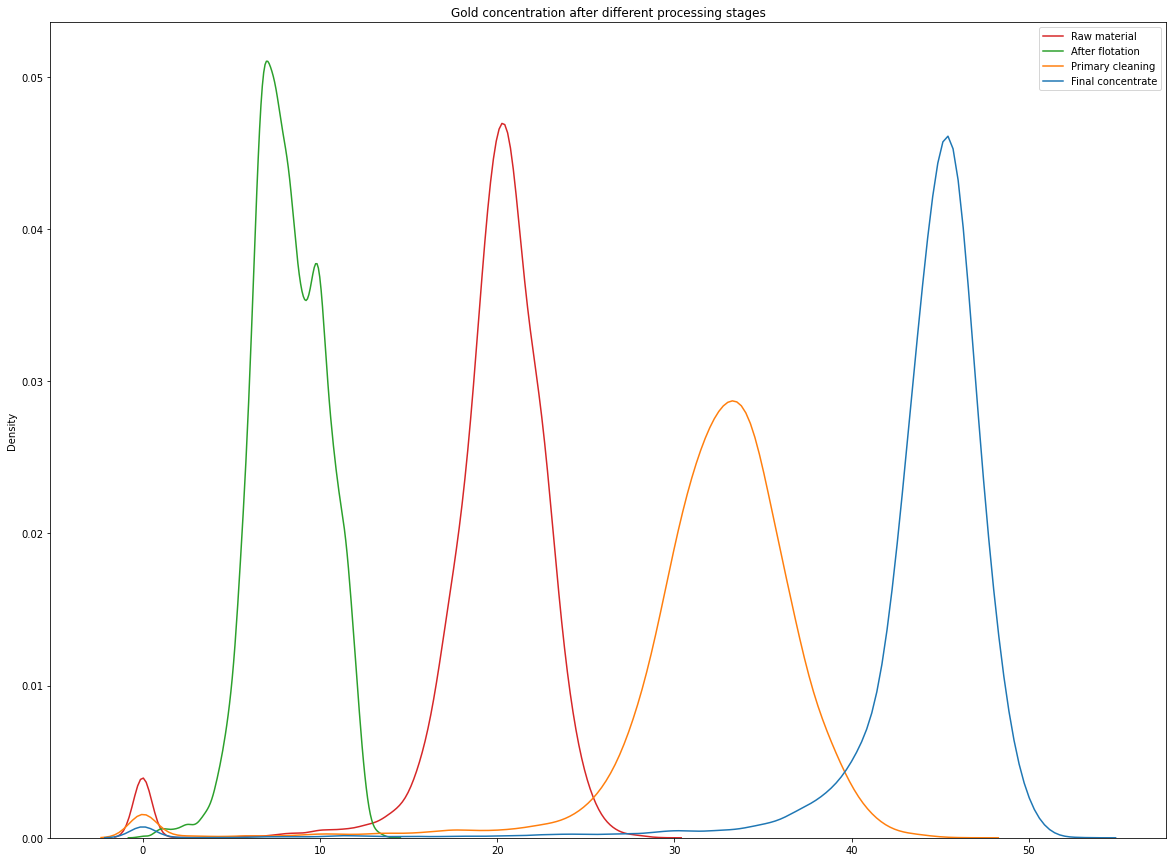

In [34]:
# AU - gold
plt.figure(figsize=[20,15])
sns.kdeplot(data=AU, legend=False)
plt.legend(['Raw material', 'After flotation', 'Primary cleaning', 'Final concentrate'], fontsize=10)
plt.title('Gold concentration after different processing stages')
plt.show()

In [35]:
AU.describe()

,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.input.feed_au,rougher.output.concentrate_au
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,44.076513,32.119400,8.266097,19.772000
std,5.129784,5.627611,1.955092,3.753600
min,0.000000,0.000000,0.010000,0.000000
25%,43.402215,30.463140,6.854384,18.802523
50%,45.011244,32.841295,8.125839,20.280214
75%,46.275313,35.048006,9.769917,21.717843
max,52.756638,45.933934,13.731330,28.824507


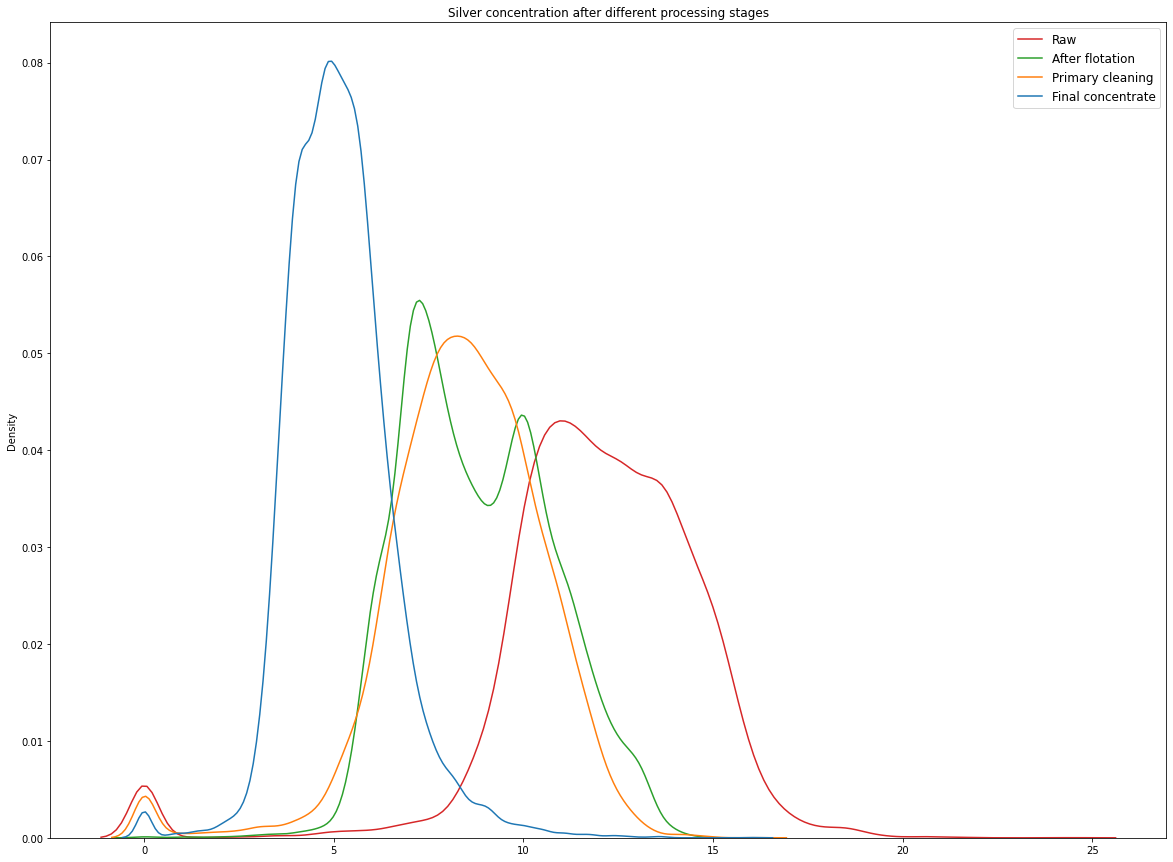

In [37]:
# AG - silver
plt.figure(figsize=[20,15])
sns.kdeplot(data=AG, legend=False)
plt.legend(['Raw', 'After flotation', 'Primary cleaning', 'Final concentrate'], fontsize=12)
plt.title('Silver concentration after different processing stages')
plt.show()

In [38]:
AG.describe()

,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.input.feed_ag,rougher.output.concentrate_ag
count,19438.000000,19438.000000,19438.000000,19438.000000
mean,5.168470,8.442496,8.795094,11.994944
std,1.372348,2.054481,1.936758,2.733811
min,0.000000,0.000000,0.010000,0.000000
25%,4.251240,7.263457,7.238066,10.628612
50%,5.066094,8.507349,8.593648,12.098115
75%,5.895527,9.809125,10.213839,13.737060
max,16.001945,16.081632,14.596026,24.480271


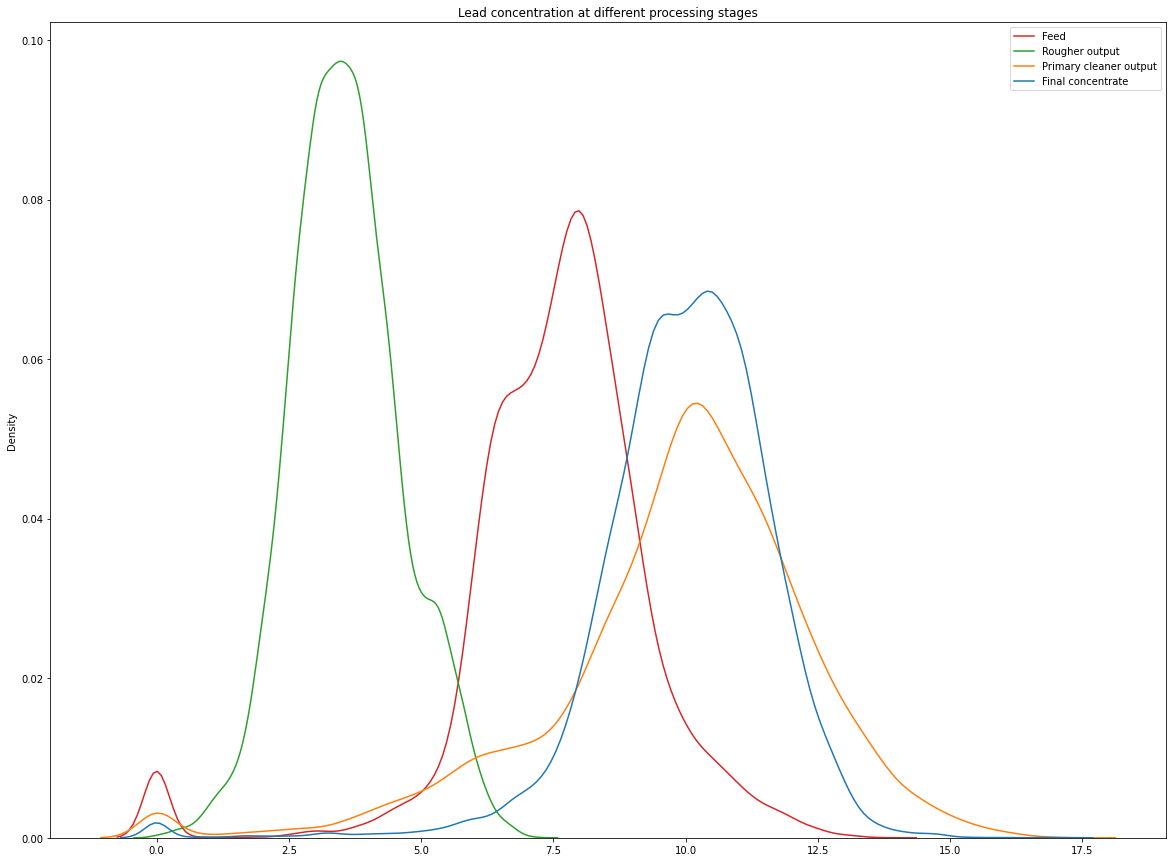

In [40]:
#PB - lead

plt.figure(figsize=[20,15])
sns.kdeplot(data=PB, legend=False)
plt.legend(['Feed', 'Rougher output', 'Primary cleaner output', 'Final concentrate'], fontsize=10)
plt.title('Lead concentration at different processing stages')
plt.show()

In [41]:
PB.describe()

,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.input.feed_pb,rougher.output.concentrate_pb
count,19223.000000,19223.000000,19223.000000,19223.000000
mean,10.009908,9.863298,3.602565,7.623825
std,1.623303,2.512413,1.047522,1.783245
min,0.000000,0.000000,0.010000,0.000000
25%,9.162575,8.735036,2.892662,6.740385
50%,10.115748,10.164130,3.539122,7.751543
75%,11.044759,11.431647,4.249361,8.573382
max,17.031899,17.081278,7.142594,13.617072


<b>Conclusion </b>

So, the concentration of silver and lead decreases, while the concentration of gold increases.

### Compare the distributions of the ore grain sizes in the training and test datasets. If the distributions are significantly different from each other, the model evaluation will be incorrect.

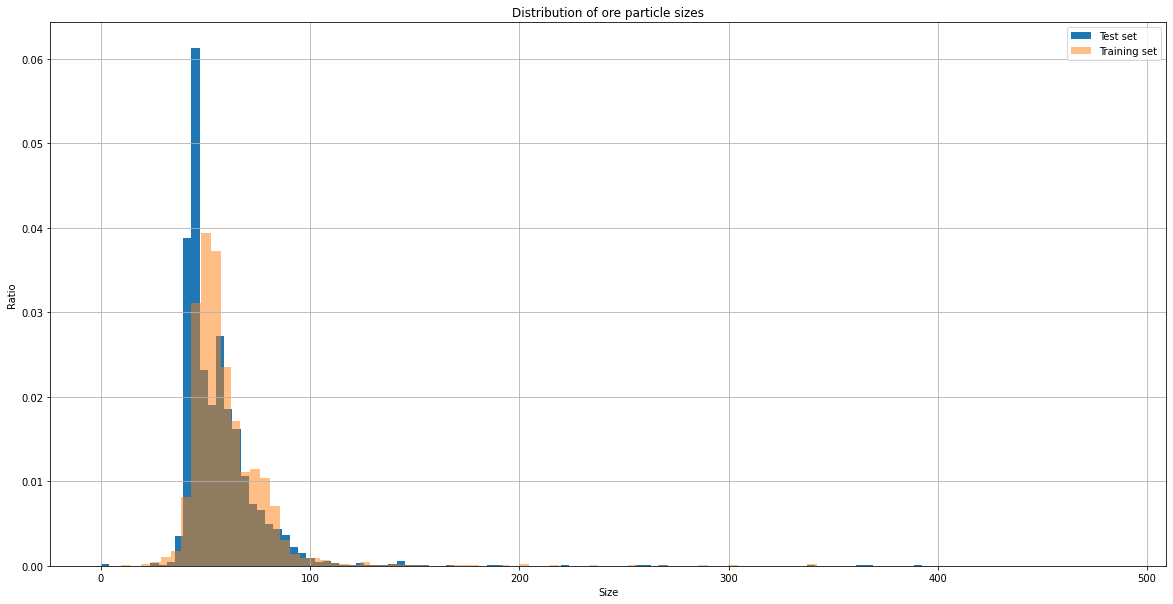

In [42]:
gold_test['rougher.input.feed_size'].hist(figsize=(20, 10), bins=100, alpha=1, density=True)
gold_train['rougher.input.feed_size'].hist(figsize=(20, 10), bins=100, alpha=0.5, density=True)
plt.legend(['Test set', 'Training set'])
plt.title('Distribution of ore particle sizes')
plt.xlabel('Size')
plt.ylabel('Ratio')
plt.show()

In [43]:
gold_test['rougher.input.feed_size'].describe ()

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

In [44]:
gold_train['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

<b>Conclusion:</b>

The distribution seems to be similar, but there are some differences.

### Investigate the total concentration of all substances at different stages: in raw materials, in rough and final concentrates.

In [45]:
#Let's see how the metal concentration changes at different stages of the purification process.
final_concentrate = (gold_train['final.output.concentrate_au'] + 
                     gold_train['final.output.concentrate_ag'] + 
                     gold_train['final.output.concentrate_sol'] +
                     gold_train['final.output.concentrate_pb']
                    )

feed_concentrate = (gold_train['rougher.input.feed_ag'] + 
                    gold_train['rougher.input.feed_pb'] + 
                    gold_train['rougher.input.feed_sol']+
                    gold_train['rougher.input.feed_au']
                    )

rougher_concentrate = (gold_train['rougher.output.concentrate_au'] + 
                       gold_train['rougher.output.concentrate_ag'] + 
                       gold_train['rougher.output.concentrate_pb'] +
                       gold_train['rougher.output.concentrate_sol']
                       )

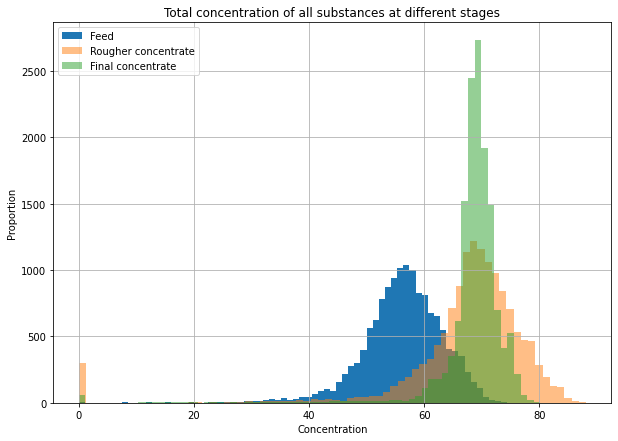

In [46]:
plt.figure(figsize=[10,7])

plt.hist(feed_concentrate, bins=70, alpha=1, label='Feed', stacked=True)
plt.hist(rougher_concentrate, bins=70, alpha=0.5, label='Rougher concentrate', stacked=True)
plt.hist(final_concentrate, bins=70, alpha=0.5, label='Final concentrate', stacked=True)
plt.grid(True)
plt.legend(['Feed', 'Rougher concentrate', 'Final concentrate'])
plt.title('Total concentration of all substances at different stages')
plt.xlabel('Concentration')
plt.ylabel('Proportion')
plt.show()

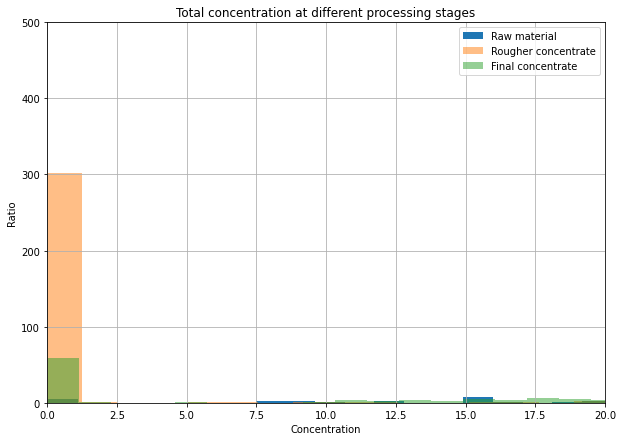

In [50]:
plt.figure(figsize=[10,7])

plt.hist(feed_concentrate, bins=70, alpha=1, label ='Raw material',stacked=True)
plt.hist(rougher_concentrate, bins=70, alpha=0.5,label ='Rougher concentrate',stacked=True)
plt.hist(final_concentrate, bins=70, alpha=0.5,label ='Final concentrate',stacked=True)
plt.grid(True)
plt.legend(['Raw material', 'Rougher concentrate', 'Final concentrate'])
plt.title('Total concentration at different processing stages')
plt.xlabel('Concentration')
plt.ylabel('Ratio')
plt.xlim(0, 20)
plt.ylim(0, 500)
plt.show()

In [47]:
print(gold_train[gold_train['rougher.output.concentrate_au'] <= 2]['rougher.output.concentrate_au'].count())
print(gold_train[gold_train['rougher.output.concentrate_ag'] <= 2]['rougher.output.concentrate_ag'].count())
print(gold_train[gold_train['rougher.output.concentrate_pb'] <=2]['rougher.output.concentrate_pb'] .count())                   
print(gold_train[gold_train['rougher.output.concentrate_sol'] <=2]['rougher.output.concentrate_sol'].count())

305
306
310
307


In [48]:
gold_train.shape

(14149, 86)

In [49]:
gold_train = gold_train.drop(gold_train[gold_train['primary_cleaner.output.concentrate_au'] == 0].index)
gold_train.shape

(14075, 86)

<B>Conclusion </B>

It is likely that the zero values of concentrations after the primary cleaning were the result of a technological process failure, so I removed them.

## Model

### Preparation 

In [51]:
missing_fields = fields_diff(gold_train, gold_test)
print(missing_fields)
gold_train = gold_train.drop(missing_fields, axis='columns')
print(fields_diff(gold_train, gold_test))
print(fields_diff(gold_test, gold_train))

{'primary_cleaner.output.concentrate_au', 'rougher.calculation.au_pb_ratio', 'final.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.tail_sol', 'final.output.concentrate_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.concentrate_sol', 'secondary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_ag', 'final.output.tail_au', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.concentrate_ag', 'rougher.output.tail_sol', 'primary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_ag', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.concentrate_ag', 'rougher.output.tail_ag', 'final.output.tail_pb', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_au', 'rougher.output.tail_pb', 'final.output.tail_ag', 'secondary_cleaner.output.tai

 ### Functions

In [63]:
#function for SMape
def smape_score(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    
    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100 

In [64]:
#unction to calculate the final sMAPE
def final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return 0.25 * smape_score(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * smape_score(target_actual_final, target_predictions_final)


In [65]:
my_scorer = make_scorer(final_smape, greater_is_better=False)

###  Model Training and Cross-Validation Evaluation


In [66]:
features_train = gold_train.drop(NEW, axis='columns')
target_train = gold_train[NEW]
features_test = gold_test.drop(NEW, axis='columns')
target_test = gold_test[NEW]

In [71]:
# DecisionTreeRegressor
param_grid = {'max_depth': range(2, 11)}

model = DecisionTreeRegressor(random_state=12345)
search = GridSearchCV(model, param_grid, cv=5, scoring=my_scorer)
search.fit(features_train, target_train)
dt_score = -search.best_score_
dt_params = search.best_params_
print('The best sMAPE value for DecisionTreeRegressor is {} with hyperparameters values: {}'.format(-search.best_score_, search.best_params_))

The best sMAPE value for DecisionTreeRegressor is 10.839289236086627 with hyperparameters values: {'max_depth': 5}


In [72]:
#RandomForestRegressor
param_grid = {'n_estimators': range(10, 40, 10)}

model = RandomForestRegressor(max_depth=2, random_state=12345)
search = GridSearchCV(model, param_grid, cv=5, scoring=my_scorer)
search.fit(features_train, target_train)
rf_score = -search.best_score_
rf_params = search.best_params_
print('The best sMAPE value for RandomForestRegressor: {} при значениях гр-параметров: {}'.format(-search.best_score_, search.best_params_))

The best sMAPE value for RandomForestRegressor: 11.015563901822675 при значениях гр-параметров: {'n_estimators': 20}


In [76]:
#LinearRegression
model = LinearRegression()
model.fit(features_train, target_train)
smape = cross_val_score(model, features_train, target_train, cv=5, scoring=my_scorer).mean()
lr_score = -smape
lr_params = 'N/A'
print('The best sMAPE value for LinearRegression:', -smape)

The best sMAPE value for LinearRegression: 12.356394039867686


 ### Select the Best Model and Test it on the Test Set

In [77]:
results = pd.DataFrame({
    'Model': ['DecisionTreeRegressor', 'RandomForestRegressor', 'LinearRegression'],
    'Best sMAPE value': [dt_score, rf_score, lr_score],
    'Hyperparameters': [dt_params, rf_params, lr_params]
})

print(results)

                   Model  Best sMAPE value       Hyperparameters
0  DecisionTreeRegressor         10.839289      {'max_depth': 5}
1  RandomForestRegressor         11.015564  {'n_estimators': 20}
2       LinearRegression         12.356394                   N/A


From the above results, we can conclude that the DecisionTreeRegressor model performed the best with the lowest sMAPE value of 10.84 and the hyperparameters values of max_depth=5. The RandomForestRegressor model also performed well with a sMAPE value of 11.02 and hyperparameters values of n_estimators=20. However, the LinearRegression model performed the worst with a sMAPE value of 12.36.

In [78]:
model = DecisionTreeRegressor(max_depth=5 ,random_state=12345)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

print('sMAPE for test data:', final_smape(target_test, predictions_test))

sMAPE for test data: 9.581497516471295


In [80]:
#compare it with a constant model DummyRegressor
dummy = DummyRegressor(strategy='median')

dummy.fit(features_train, target_train)
predictions_test = dummy.predict(features_test)
smape_test = smape_score(target_test, predictions_test)

print('sMAPE for dummy model on test data: ', smape_test)

sMAPE for dummy model on test data:  rougher.output.recovery    8.623462
final.output.recovery      9.765153
dtype: float64


Conclusion:

The Decision Tree model gave the best sMAPE value among the other models and predicted the target feature values rougher.output.recovery and final.output.recovery on the test set with an sMAPE of 9.581497516471295.


During the project, the following tasks were performed:

Data preparation.
Exploratory data analysis.
Model building and training.
The final model was built using the DecisionTreeRegressor algorithm with hyperparameters max_depth=5. The effectiveness of the enrichment was calculated correctly. The model showed the best sMAPE value among the other models and predicted the target feature rougher.output.recovery and final.output.recovery with sMAPE value of 9.58 on the test dataset.

Overall, the project was successful in achieving the goal of building an accurate model to predict the target feature and providing useful insights into the data.